In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("../data/cleaned/final_merged_dataset.csv")
df.head()

,State,Crime_Type,Year,Cases,unemployment_rate,poverty_rate,per_capita_income,inflation_rate,population_density,gender_ratio,literacy_rate,youth_population_percent,urbanization_rate,human_development_index,police_stations_per_district,conviction_rate,police_personnel_per_100k,alcohol_consumption_per_capita
0,Andaman & Nicobar Islands,Burglary,2001,57,5.88,38.54,21691.8,4.4,10,915,61.94,24.0,22.0,0.535,6,37.0,59,2.3
1,Andaman & Nicobar Islands,Dacoity,2001,7,5.88,38.54,21691.8,4.4,10,915,61.94,24.0,22.0,0.535,6,37.0,59,2.3
2,Andaman & Nicobar Islands,Dowry Deaths,2001,0,5.88,38.54,21691.8,4.4,10,915,61.94,24.0,22.0,0.535,6,37.0,59,2.3
3,Andaman & Nicobar Islands,Kidnapping & Abduction,2001,33,5.88,38.54,21691.8,4.4,10,915,61.94,24.0,22.0,0.535,6,37.0,59,2.3
4,Andaman & Nicobar Islands,Murder,2001,10,5.88,38.54,21691.8,4.4,10,915,61.94,24.0,22.0,0.535,6,37.0,59,2.3


In [2]:
df.describe()

,Year,Cases,unemployment_rate,poverty_rate,per_capita_income,inflation_rate,population_density,gender_ratio,literacy_rate,youth_population_percent,urbanization_rate,human_development_index,police_stations_per_district,conviction_rate,police_personnel_per_100k,alcohol_consumption_per_capita
count,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000
mean,2011.500000,2494.161760,5.897364,28.075610,48335.532675,4.983247,103.270130,901.533766,69.921675,25.178312,37.020779,0.652336,10.174026,36.987662,103.738961,2.669688
std,6.344747,8069.454875,0.994195,4.293755,39523.696963,1.419813,96.061581,27.151033,7.350325,2.948810,8.139293,0.054179,4.173605,6.252405,20.232866,0.560403
min,2001.000000,0.000000,2.800000,18.600000,5712.000000,2.000000,10.000000,850.000000,54.960000,16.580000,17.000000,0.484000,5.000000,22.100000,54.000000,1.170000
25%,2006.000000,31.000000,5.230000,24.980000,23480.140000,3.990000,11.000000,879.000000,64.190000,22.920000,30.400000,0.616000,7.000000,32.200000,89.000000,2.280000
50%,2011.500000,285.000000,5.955000,27.500000,38289.500000,5.035000,87.000000,904.000000,69.240000,25.650000,36.700000,0.654000,9.000000,37.600000,104.000000,2.650000
75%,2017.000000,1398.750000,6.590000,31.000000,66358.000000,5.950000,165.000000,923.000000,75.070000,27.580000,43.800000,0.691000,13.000000,41.700000,117.000000,3.070000
max,2022.000000,163119.000000,8.550000,39.230000,199643.430000,8.870000,408.000000,952.000000,84.520000,31.000000,54.400000,0.810000,19.000000,51.100000,166.000000,4.070000


In [3]:
numerical_cols = [
    'Year', 'unemployment_rate', 'poverty_rate', 'per_capita_income',
    'inflation_rate', 'population_density', 'gender_ratio', 'literacy_rate',
    'youth_population_percent', 'urbanization_rate', 'human_development_index',
    'police_stations_per_district', 'conviction_rate',
    'police_personnel_per_100k', 'alcohol_consumption_per_capita'
]

categorical_cols = ['State', 'Crime_Type']

In [4]:
target = 'Cases'

features = [
    'State', 'Crime_Type', 'Year', 'unemployment_rate', 'poverty_rate', 'per_capita_income',
    'inflation_rate', 'population_density', 'gender_ratio', 'literacy_rate',
    'youth_population_percent', 'urbanization_rate', 'human_development_index',
    'police_stations_per_district', 'conviction_rate', 'police_personnel_per_100k',
    'alcohol_consumption_per_capita'
]

X_raw = df[features]
y = df[target]

train_df = df[df['Year'] <= 2020]
test_df  = df[df['Year'] > 2020]

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

X_train_raw = train_df[features]
y_train = train_df[target]

X_test_raw = test_df[features]
y_test = test_df[target]

print(" Data successfully split")

Train shape: (6300, 18)
Test shape: (630, 18)
 Data successfully split


In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', StandardScaler(), numerical_cols),
        ('categorical', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ]
)

X_train = preprocessor.fit_transform(train_df[categorical_cols + numerical_cols])
X_test  = preprocessor.transform(test_df[categorical_cols + numerical_cols])

# Extract final feature names from ColumnTransformer
feature_names = [str(f) for f in preprocessor.get_feature_names_out()]
print("Number of features:", len(feature_names))


print("One-Hot Encoding & Scaling Done!")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Number of features: 59
One-Hot Encoding & Scaling Done!
Train shape: (6300, 59)
Test shape: (630, 59)


In [6]:
import joblib
import numpy as np
import pandas as pd
from math import sqrt
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [7]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
import pandas as pd

param_grid = [
    {"n_estimators": 120, "learning_rate": 0.03, "max_depth": 4, "subsample": 0.9},
    {"n_estimators": 150, "learning_rate": 0.02, "max_depth": 5, "subsample": 0.8},
    {"n_estimators": 200, "learning_rate": 0.015, "max_depth": 6, "subsample": 0.9},
    {"n_estimators": 170, "learning_rate": 0.025, "max_depth": 4, "subsample": 0.9},
    {"n_estimators": 140, "learning_rate": 0.018, "max_depth": 3, "subsample": 1.0},
]

results = []
best_model = None
best_test_r2 = -999

for params in param_grid:

    print(f"\n Training model with params: {params}")

    model = XGBRegressor(
        n_estimators=params["n_estimators"],
        learning_rate=params["learning_rate"],
        max_depth=params["max_depth"],
        subsample=params["subsample"],
        colsample_bytree=0.9,
        reg_lambda=1.2,
        reg_alpha=0.3,
        min_child_weight=3,
        gamma=0.4,
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train, y_train)

    y_pre = model.predict(X_train)
    y_pred = model.predict(X_test)

    train_r2 = r2_score(y_train, y_pre)
    test_r2 = r2_score(y_test, y_pred)

    result = {
        "params": params,
        "Train R2": train_r2,
        "Test R2": test_r2,
        "Train RMSE": sqrt(mean_squared_error(y_train, y_pre)),
        "Test RMSE": sqrt(mean_squared_error(y_test, y_pred)),
        "Train MAE": mean_absolute_error(y_train, y_pre),
        "Test MAE": mean_absolute_error(y_test, y_pred)
    }

    results.append(result)

    # Track best model based on Test R2
    if test_r2 > best_test_r2:
        best_test_r2 = test_r2
        best_model = (model, result)

# Convert results to DataFrame
df_results = pd.DataFrame(results)
print("\n======================================")
print("ALL MODEL RESULTS")
print("======================================")
print(df_results)

print("\n======================================")
print("BEST MODEL")
print("======================================")
print(best_model[1])



 Training model with params: {'n_estimators': 120, 'learning_rate': 0.03, 'max_depth': 4, 'subsample': 0.9}

 Training model with params: {'n_estimators': 150, 'learning_rate': 0.02, 'max_depth': 5, 'subsample': 0.8}

 Training model with params: {'n_estimators': 200, 'learning_rate': 0.015, 'max_depth': 6, 'subsample': 0.9}

 Training model with params: {'n_estimators': 170, 'learning_rate': 0.025, 'max_depth': 4, 'subsample': 0.9}

 Training model with params: {'n_estimators': 140, 'learning_rate': 0.018, 'max_depth': 3, 'subsample': 1.0}

ALL MODEL RESULTS
                                              params  Train R2   Test R2  \
0  {'n_estimators': 120, 'learning_rate': 0.03, '...  0.799153  0.804053   
1  {'n_estimators': 150, 'learning_rate': 0.02, '...  0.839993  0.784376   
2  {'n_estimators': 200, 'learning_rate': 0.015, ...  0.888900  0.784366   
3  {'n_estimators': 170, 'learning_rate': 0.025, ...  0.816574  0.804438   
4  {'n_estimators': 140, 'learning_rate': 0.018, ... 

In [8]:
best_xgb = best_model[0]                     # extract best model
trees = best_xgb.get_booster().get_dump()    # dump all trees
len(trees)                                    # number of trees

170

In [9]:
best_xgb = best_model[0]
booster = best_xgb.get_booster()
booster.feature_names = feature_names 

tree = booster.get_dump(with_stats=True)[0]
print(tree)


0:[categorical__Crime_Type_Theft<1] yes=1,no=2,missing=2,gain=1.04038801e+11,cover=5635
	1:[numerical__per_capita_income<0.534974694] yes=3,no=4,missing=4,gain=3.6331735e+09,cover=4992
		3:[numerical__per_capita_income<-0.409888059] yes=7,no=8,missing=8,gain=984417280,cover=3809
			7:[categorical__Crime_Type_Burglary<1] yes=15,no=16,missing=16,gain=8015872,cover=2152
				15:leaf=-61.4018555,cover=1880
				16:leaf=-55.1174622,cover=272
			8:[categorical__Crime_Type_Burglary<1] yes=17,no=18,missing=18,gain=1.82091494e+09,cover=1657
				17:leaf=-44.741024,cover=1454
				18:leaf=35.0309601,cover=203
		4:[categorical__Crime_Type_Burglary<1] yes=9,no=10,missing=10,gain=3.60750515e+09,cover=1183
			9:[categorical__Crime_Type_Kidnapping & Abduction<1] yes=19,no=20,missing=20,gain=3.43220326e+09,cover=1034
				19:leaf=-34.2106133,cover=891
				20:leaf=97.2535095,cover=143
			10:[numerical__population_density<0.840273082] yes=21,no=22,missing=22,gain=204599040,cover=149
				21:leaf=59.3047791,co

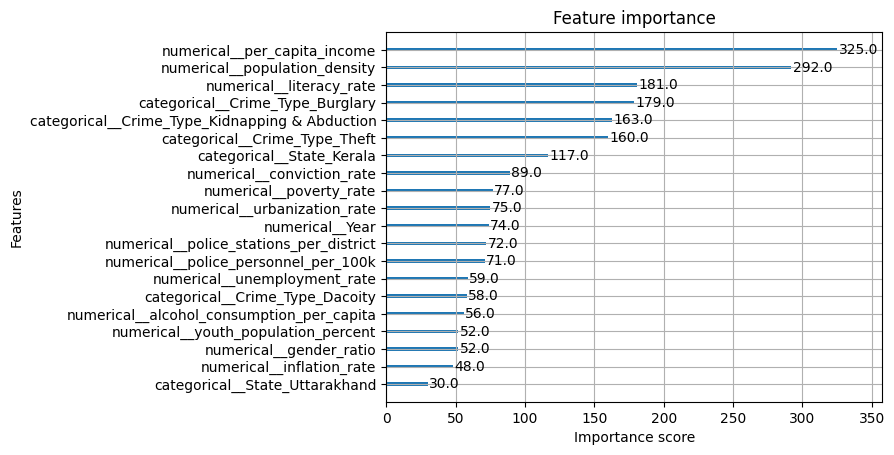

In [10]:
import matplotlib.pyplot as plt
import xgboost as xgb

best_xgb = best_model[0]

feature_names = [str(f) for f in preprocessor.get_feature_names_out()]
best_xgb.get_booster().feature_names = feature_names

xgb.plot_importance(best_xgb, max_num_features=20)
plt.show()


In [13]:
import joblib
joblib.dump(best_model[0], "../model/xgb_model.pkl")

['../model/xgb_model.pkl']

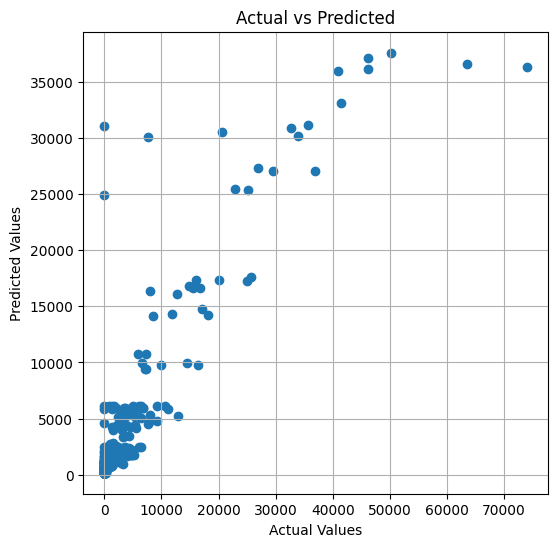

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

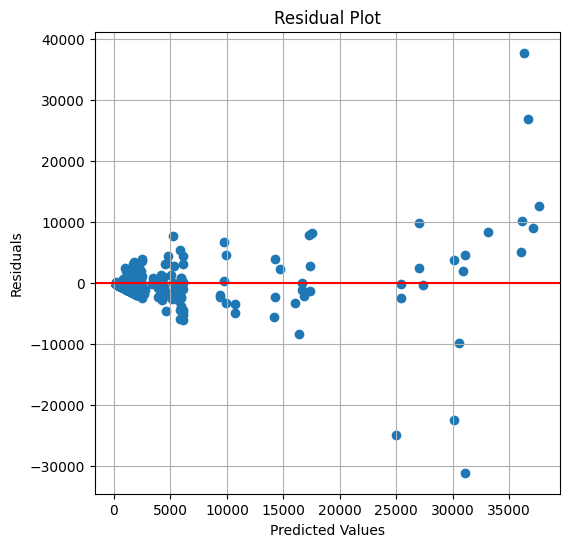

In [15]:
import numpy as np

residuals = y_test - y_pred

plt.figure(figsize=(6,6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


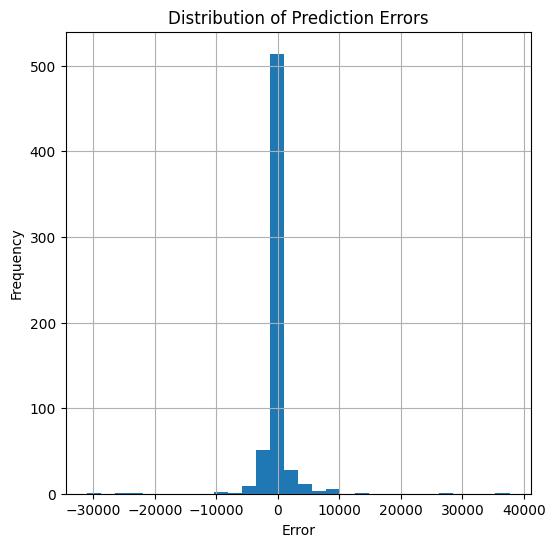

In [16]:
plt.figure(figsize=(6,6))
plt.hist(residuals, bins=30)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

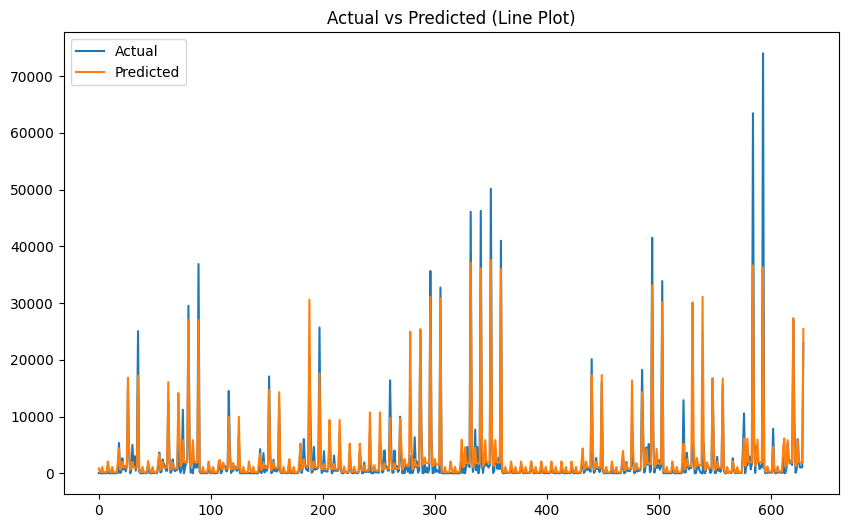

In [17]:
plt.figure(figsize=(10,6))
plt.plot(list(range(len(y_test))), y_test, label="Actual")
plt.plot(list(range(len(y_pred))), y_pred, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted (Line Plot)")
plt.show()
